# Exploratory data analysis of the Pokémon data set
EDA of the Pokémon dataset taken from https://www.kaggle.com/rounakbanik/pokemon, including types, base stats, and various other information on 802 Pokémon from 7 generations. _Gotta catch 'em all!_

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches

import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import time

In [2]:
# Load data from CSV file
stats = pd.read_csv('pokemon_complete.csv')

# Pick relevant features
stats = stats[['pokedex_number', 'name', 'type1', 'type2', 
               'base_total', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 
               'generation', 'is_legendary', 'weight_kg', 'height_m']]

# Customize columns
stats['is_legendary'] = stats['is_legendary'].astype('bool')
stats['type1'] = stats['type1'].str.capitalize()
stats['type2'] = stats['type2'].str.capitalize()

stats.sort_values(by='pokedex_number', ascending=True).head()

,pokedex_number,name,type1,type2,base_total,hp,attack,defense,sp_attack,sp_defense,speed,generation,is_legendary,weight_kg,height_m
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,6.9,0.7
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,13.0,1.0
2,3,Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,100.0,2.0
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,8.5,0.6
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,19.0,1.1


In [3]:
stats.describe(include = 'all')

,pokedex_number,name,type1,type2,base_total,hp,attack,defense,sp_attack,sp_defense,speed,generation,is_legendary,weight_kg,height_m
count,801.000000,801,801,417,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801,781.000000,781.000000
unique,NaN,801,18,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
top,NaN,Kyogre,Water,Flying,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN
freq,NaN,1,114,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,731,NaN,NaN
mean,401.000000,NaN,NaN,NaN,428.377029,68.958801,77.857678,73.008739,71.305868,70.911361,66.334582,3.690387,NaN,61.378105,1.163892
std,231.373075,NaN,NaN,NaN,119.203577,26.576015,32.158820,30.769159,32.353826,27.942501,28.907662,1.930420,NaN,109.354766,1.080326
min,1.000000,NaN,NaN,NaN,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000,NaN,0.100000,0.100000
25%,201.000000,NaN,NaN,NaN,320.000000,50.000000,55.000000,50.000000,45.000000,50.000000,45.000000,2.000000,NaN,9.000000,0.600000
50%,401.000000,NaN,NaN,NaN,435.000000,65.000000,75.000000,70.000000,65.000000,66.000000,65.000000,4.000000,NaN,27.300000,1.000000
75%,601.000000,NaN,NaN,NaN,505.000000,80.000000,100.000000,90.000000,91.000000,90.000000,85.000000,5.000000,NaN,64.800000,1.500000


## Pokémon type distribution through the generations
How common are the different types and how does that change through the generations?
* Absolute frequencies are accumulated over generations.
* Dual-type and single-type Pokémon are weighted equally, i.e., single-types are weighted 1 whereas dual-types are weighted half-half.
* Mega evolutions are excluded from the dataset.

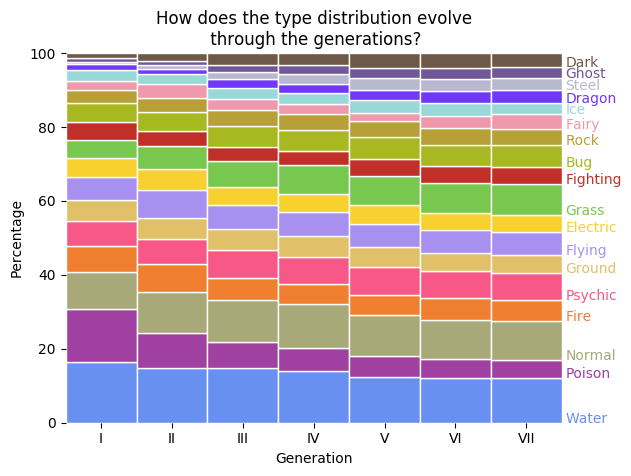

In [8]:
type1_ct = pd.crosstab(stats['type1'], stats['generation'])
type2_ct = pd.crosstab(stats['type2'].fillna(value=stats['type1']), stats['generation'])
type_ct_abs = (type1_ct + type2_ct).cumsum(axis=1)

type_ct_rel = type_ct_abs/type_ct_abs.sum()*100
    
types = ['Water', 'Poison', 'Normal', 'Fire', 'Psychic', 'Ground', 'Flying', 'Electric', 'Grass', 'Fighting',
         'Bug', 'Rock', 'Fairy', 'Ice', 'Dragon', 'Steel', 'Ghost', 'Dark']

type_colormap = {'Water': '#6890F0', 'Poison': '#A040A0', 'Normal': '#A8A878', 'Fire': '#F08030', 'Psychic': '#F85888',
                 'Ground': '#E0C068', 'Flying': '#A890F0', 'Electric': '#F8D030', 'Grass': '#78C850', 'Fighting': '#C03028',
                 'Bug': '#A8B820', 'Rock': '#B8A038', 'Fairy': '#EE99AC', 'Ice': '#98D8D8', 'Dragon': '#7038F8',
                 'Ghost': '#705898', 'Steel': '#B8B8D0', 'Dark': '#705848'}

plt.style.use('default')
fig, ax = plt.subplots()

barWidth = 1
ypos= [0]*7
for t in np.arange(len(types)):
    plt.bar(np.arange(1,8), type_ct_rel.loc[types[t]], bottom=ypos, label=types[t], width=barWidth, 
            color=type_colormap[types[t]], edgecolor='w')
    plt.text(7.55, ypos[-1], types[t], color=type_colormap[types[t]])
    ypos += type_ct_rel.loc[types[t]].values
    
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_title('How does the type distribution evolve\n through the generations?')
ax.set_xlabel('Generation')
ax.set_ylabel('Percentage')
ax.set_xlim([0.5, 7.5])
ax.set_ylim([0, 100])
ax.set_xticklabels(['', 'I', 'II', 'III', 'IV', 'V', 'VI', 'VII'])

fig.savefig('pokemon_preview.png', bbox_inches='tight')

### Insights
* In Gen. I, 4 in 10 Pokémon were either of type Water, Poison or Normal.
* Through the generations, creators worked towards a more uniform type distribution by adding more Pokémon of underrepresented types.
* Grass type Pokémon had the largest percentage increase in share (+3.5%) from Gen. I to Gen. VII, while Poison type Pokémon had by far the largest decrease (-9.3%). 

## Ability stats distributions grouped by type
Which Pokémon type is the strongest, which the fastest, and which the tallest?

Text(0, 0.5, 'base_total ability value')

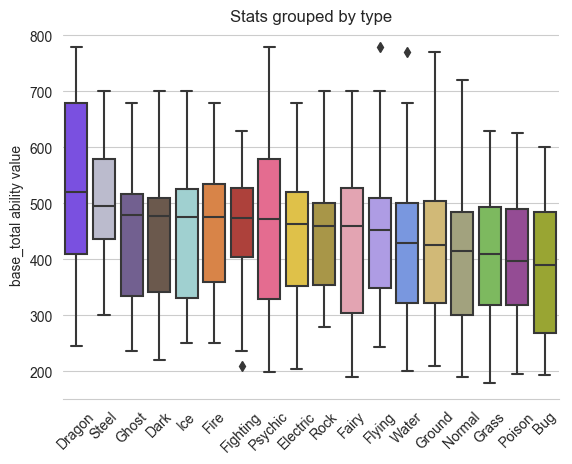

In [5]:
stats_melt = pd.melt(stats, 
    id_vars=['pokedex_number', 'base_total', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 
             'weight_kg', 'height_m'],
             value_vars=['type1','type2']).dropna(subset=['value'])

ability = 'base_total'
ranking = stats_melt.groupby(['value']).median().sort_values(by=[ability], ascending=False).index
sns.set_style("whitegrid")
fig = sns.boxplot(x='value', y=ability, data=stats_melt,
                  order=ranking, palette=[type_colormap[t] for t in ranking])

sns.despine(left=True);
plt.title('Stats grouped by type')
plt.xticks(rotation=45)
#plt.ylim([0,200])
plt.xlabel('')
plt.ylabel(ability + ' ability value')
#print([type_colormap[t] for t in ranking])

### Insights
* Dragon Pokémon are the tallest, heaviest, and generally: best.
* Bug type Pokémon are the statistically weakest (by base total). However, the best defender is a bug-type: Shuckle. As is the best attacker: Heracross.
* Fairy Pokémon are extremely light and by far the worst physical attackers.

## Base ability stats distributions grouped by generation
Which generation is the strongest? How did the generations evolve?

Text(0, 0.5, 'base_total ability value')

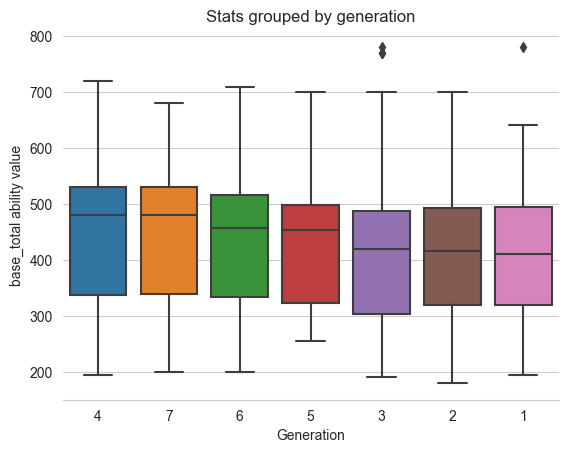

In [6]:
stats_melt = pd.melt(stats, 
    id_vars=['pokedex_number', 'base_total', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 
             'weight_kg', 'height_m'],
             value_vars=['generation']).dropna(subset=['value'])

ability = 'base_total'
ranking = stats_melt.groupby(['value']).median().sort_values(by=[ability], ascending=False).index
sns.set_style("whitegrid")
fig = sns.boxplot(x='value', y=ability, data=stats_melt,
                  order=ranking)

sns.despine(left=True);
plt.title('Stats grouped by generation')
plt.xticks(rotation=0)
#plt.ylim([0,200])
plt.xlabel('Generation')
plt.ylabel(ability + ' ability value')

### Insights
* With the exception of generation IV, the strongest generation, Pokémon got stronger with each new generation. Possibly to boost sales?

## Legendary status
How much stronger are legendary Pokémon?

Text(0, 0.5, 'Base total')

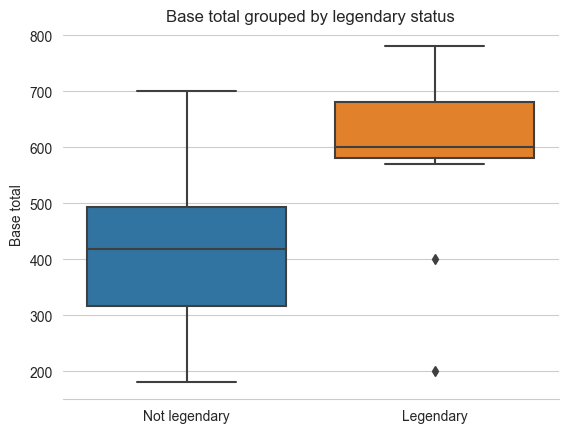

In [23]:
stats_melt = pd.melt(stats, 
    id_vars=['pokedex_number', 'base_total', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 
             'weight_kg', 'height_m'],
             value_vars=['is_legendary']).dropna(subset=['value'])

fig = sns.boxplot(x='value', y='base_total', data=stats_melt)
sns.despine(left=True);
plt.title('Base total grouped by legendary status')
plt.xlabel('')
plt.xticks(ticks=[0,1], labels=['Not legendary', 'Legendary'], rotation=0)
plt.ylabel('Base total')

### Insights
* Not surprisingly, legendary Pokémon are significantly stronger than non-legendaries.
* Cosmog and its evolution Cosmoem are by far the weakest legendary Pokémon with base totals of 200 and 400, respectively.


## Ability stats correlations
How do the different abilty stats relate to each other? Are their strong (anti-)correlations?

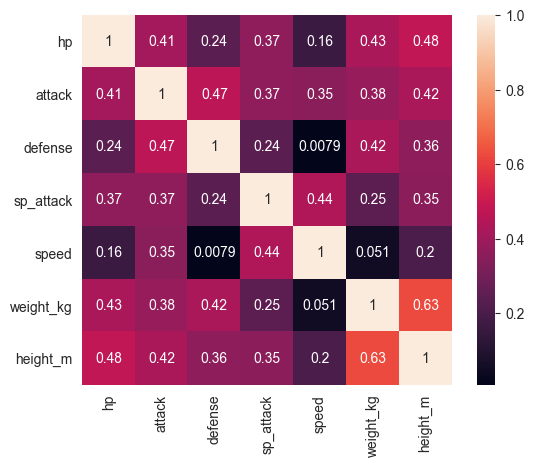

In [7]:
val_cols = ['hp', 'attack', 'defense', 'sp_attack', 'speed', 'weight_kg', 'height_m']

corr_stats = stats[val_cols]
corr_stats.head()
corr = corr_stats.corr()

sns.heatmap(corr, annot=True, square=True)

### Insights
* Generally speaking, better Pokémon are better overall as correlation coefficients are uniformly positive.
* However, the defense value only scales very weakly for fast Pokémon. Or, to put it differently: Fast Pokémon are—considering their overall strength—poor defenders.
* In the same way, heavy Pokémon are comparatively slow (makes sense).

# Experimental analyses below:
The goal of the analyses below is to apply techniques of dimensionality reduction in order to identify groups of Pokémon classes, e.g., fast and light or weak and small Pokémon.

## Dimensinality reduction I: PCA

[[-44.97993112  -9.20093767]
 [-13.72243307 -10.72136311]
 [ 67.63983016  10.74904027]
 ...
 [ 63.81470576   3.71772898]
 [ 71.11038382  -2.82504313]
 [ 60.60437343   9.6655551 ]]
Explained variation per principal component: [0.46400644 0.21271096]


Text(40.75333256172837, 0.5, 'PCA component 2')

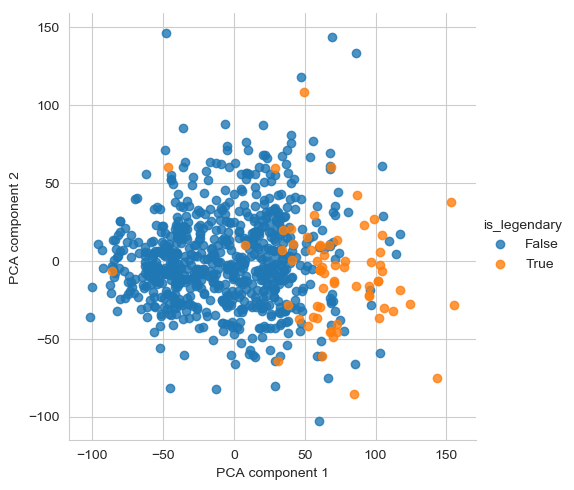

In [10]:
val_cols = ['hp', 'attack', 'defense', 'sp_attack', 'speed']

# From 5 to 2 dimensions
pca = PCA(n_components=2)
pca_projected = pca.fit_transform(stats[val_cols].values)

print(pca_projected)

stats_dr = stats.copy(deep=True)
stats_dr['pca-one'] = pca_projected[:,0]
stats_dr['pca-two'] = pca_projected[:,1]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

sns.lmplot(x='pca-one', y='pca-two', data=stats_dr, hue='is_legendary', fit_reg=False)
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')

## Dimensinality reduction II: t-SNE

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 801 samples in 0.037s...
[t-SNE] Computed neighbors for 801 samples in 0.063s...
[t-SNE] Computed conditional probabilities for sample 801 / 801
[t-SNE] Mean sigma: 11.321823
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.945438
[t-SNE] KL divergence after 300 iterations: 1.036884
[[ 10.9861355    2.8160956 ]
 [ -0.86414754   8.365234  ]
 [-11.116933    -8.239435  ]
 ...
 [ -2.1863399   -1.2919748 ]
 [-11.820926    -7.774895  ]
 [-10.9895315   -8.580408  ]]


Text(38.877145061728385, 0.5, 'PCA component 2')

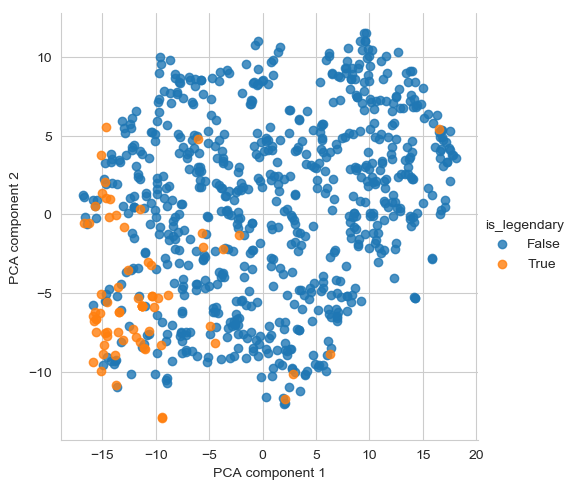

In [11]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_projected = tsne.fit_transform(stats[val_cols].values)

print(tsne_projected)
stats_dr['tsne-one'] = tsne_projected[:,0]
stats_dr['tsne-two'] = tsne_projected[:,1]

sns.lmplot(x='tsne-one', y='tsne-two', data=stats_dr, hue='is_legendary', fit_reg=False)
#plt.scatter(stats['tsne-one'], stats['tsne-two'], color=".1")
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')

### Preliminary insights
* Reducing dimensions of the Pokémon base stat data space does not seem to reveal any obvious groupings, neither in PCA, nor in t-SNE.
* Plotting the reduced dimensionality data and grouping by legendary status shows that one can identify an axis that most probably correlates with overall strength.